###### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##### Read the 3 datasets into different data frames

#### Dataset 1: Manual download

In [2]:
tweets_df = pd.read_csv('twitter-archive-enhanced.csv')
tweets_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Dataset 2: Programatic download

Import the libraries needed for programatic download

In [3]:
import requests
import os

In [4]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

The "<Response [200]>" shows that the request suceeded.

In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)
images_df = pd.read_csv('/Users/orukotanoluwatobiloba/image_predictions/image-predictions.tsv', sep='\t')
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Dataset 3: Scrapped data

In [7]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [8]:
file_path = '/Users/orukotanoluwatobiloba/Downloads/Udacity/tweet_json.txt'
deleted_tweet_ids = []


with open(file_path, 'w') as file:
    file.write('tweet_id, favorite_count, retweet_count')
    file.write('\n')
    
    for tweet_id in tweets_df.tweet_id.values:
        try:
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            file.write('{0},{1},{2}'.format(tweet_id,tweet.favorite_count,tweet.retweet_count))
            file.write('\n')
        except:
            deleted_tweet_ids.append(tweet_id)

Rate limit reached. Sleeping for: 38


In [9]:
deleted_tweet_ids

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 856330835276025856,
 855862651834028034,
 851953902622658560,
 851861385021730816,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 766864461642756096,
 759923798737051648,
 759566828574212096,
 754011816964026368,
 680055455951884288,
 670780561024270336]

In [10]:
len(deleted_tweet_ids)

31

29 tweets in the twitter-archive-enhanced.csv file have been deleted

In [11]:
tweets_data = pd.read_csv(file_path,sep=',')

In [12]:
tweets_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33813,7006
1,892177421306343426,29329,5301
2,891815181378084864,22048,3480
3,891689557279858688,36937,7226
4,891327558926688256,35313,7758


### Data Accessing

##### Accessing the tweets_df (twitter-archive-enhanced.csv) dataset

In [13]:
tweets_df.shape

(2356, 17)

In [14]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
tweets_df.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675...,10,10,None,None,None,pupper,None
543,805958939288408065,NaN,NaN,2016-12-06 02:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Penny. She fought a bee...,7.827226e+17,4.196984e+09,2016-10-02 23:23:04 +0000,https://twitter.com/dog_rates/status/782722598...,10,10,Penny,None,None,None,None
887,759923798737051648,NaN,NaN,2016-08-01 01:28:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs... this is a Taiwanese Guide...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759923798...,10,10,None,None,None,None,None
986,749064354620928000,NaN,NaN,2016-07-02 02:17:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's pupset because I forgot to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749064354...,11,10,Winston,None,None,None,None
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None
1423,697995514407682048,NaN,NaN,2016-02-12 04:07:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman quit playin I jus wanna wheat t...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/697995514...,11,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
139,865359393868664832,NaN,NaN,2017-05-19 00:12:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sammy. Her tongue ejects without warni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865359393...,13,10,Sammy,None,None,None,None


##### Accessing the images_df (image_predictions.tsv) dataset

In [16]:
images_df.shape

(2075, 12)

In [17]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
images_df.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,1,Chesapeake_Bay_retriever,0.488555,True,Sussex_spaniel,0.271655,True,kelpie,0.106913,True
203,669749430875258880,https://pbs.twimg.com/media/CUttjYtWcAAdPgI.jpg,1,washbasin,0.245794,False,toilet_seat,0.109420,False,paper_towel,0.105664,False
1821,834574053763584002,https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg,1,toilet_tissue,0.262936,False,golden_retriever,0.226564,True,bathtub,0.078879,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
1181,738184450748633089,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,Bedlington_terrier,0.289471,True,standard_poodle,0.173685,True,Great_Pyrenees,0.157081,True
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True
176,669203728096960512,https://pbs.twimg.com/media/CUl9PGBVEAUV3Wz.jpg,1,pug,0.910452,True,French_bulldog,0.055090,True,Chihuahua,0.014897,True
664,682697186228989953,https://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg,1,bald_eagle,0.097232,False,torch,0.096621,False,cliff,0.090385,False
1205,741793263812808706,https://pbs.twimg.com/media/CkthBj7WgAAsIGb.jpg,1,kuvasz,0.311325,True,French_bulldog,0.115349,True,Labrador_retriever,0.068533,True
896,699691744225525762,https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg,1,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False


##### Accessing the tweets_data (tweet_json.txt) dataset

In [19]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2325 non-null   int64
 1    favorite_count  2325 non-null   int64
 2    retweet_count   2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [20]:
tweets_data.shape

(2325, 3)

In [21]:
tweets_data.sample(10)

,tweet_id,favorite_count,retweet_count
2187,668507509523615744,279,87
802,769212283578875904,5085,1600
1562,686606069955735556,1754,492
929,751456908746354688,3012,925
1265,707995814724026368,2880,1017
672,786963064373534720,25289,7432
1368,699779630832685056,2510,1111
557,800751577355128832,10093,2635
756,775898661951791106,0,15537
485,813051746834595840,19923,6861


##### Creating copies of datasets

In [22]:
tweets_df_clean = tweets_df.copy()
images_df_clean = images_df.copy()
tweets_data_clean = tweets_data.copy()

### Data Cleaning

While accessing the data some issues were found The issues have been split into two categories; Data Quality Issues and Data Tidiness Issues. The two classes of issues are further explained below.

``Data Quality Issues``

1. Some of the tweets in the twitter-archive-enhanced datasets have been deleted and their favorite and retweet count info can't be pulled from Twitter's API. We need to drop these records
2. Timestamp values have a trailing ' +0000' at their ends. This should be stripped off
3. Some of the features have the wrong datatype in the dataframe. Their datatypes need to be changed
4. The source column values contain html tags. Extract the url from the values in the column
5. Drop records in the tweets_df that don't have images
6. Change 'None' and other invalid dog name values in the name column to np.nan values
7. Extract the correct ratings using regular expressions
8. Change status and User Id to object datatype

``Data Tidiness Issues``

1. Strip the tweet_data columns of leading and trailing white spaces
2. In the tweets_df dataframe ('twitter-archive-enhanced.csv') doggo, fluffer, pupper, and puppo are all dog_classes and should be one variable instead of four different variables.
3. Separate tweets from retweets and replies.
4. Remove columns related to retweets and replies from the tweets data frame.
5. Save  merged dataframe in a csv file.

### Data Quality Issues Fix

##### 1. Define

Some of the tweets in the twitter-archive-enhanced.csv file has been deleted and their records could not be gotten using the Twitter API. 'deleted_tweets' contains the ID of tweets that have been deleted. We need to drop these records

##### Code


In [23]:
len(tweets_df_clean)

2356

In [24]:
tweets_df_clean = tweets_df_clean[~tweets_df_clean['tweet_id'].isin(deleted_tweet_ids)]

##### Test


In [25]:
assert len(tweets_df_clean) == (len(tweets_df)-len(deleted_tweet_ids))

##### 2. Define

Remove trailing ' +0000' from time stamp values

##### Code

In [26]:
def clean_timestamp(timestamp):
    """returns the timestamp argument without the last 6 characters"""
    return str(timestamp)[:-5]
date_time_cols = ['timestamp', 'retweeted_status_timestamp']
for col in date_time_cols:
    tweets_df_clean[col] = tweets_df_clean[col].apply(lambda x: clean_timestamp(x))
    tweets_df_clean[col] = pd.to_datetime(tweets_df_clean[col])

##### Test

In [27]:
tweets_df_clean[date_time_cols]

,timestamp,retweeted_status_timestamp
0,2017-08-01 16:23:56,NaT
1,2017-08-01 00:17:27,NaT
2,2017-07-31 00:18:03,NaT
3,2017-07-30 15:58:51,NaT
4,2017-07-29 16:00:24,NaT
...,...,...
2351,2015-11-16 00:24:50,NaT
2352,2015-11-16 00:04:52,NaT
2353,2015-11-15 23:21:54,NaT
2354,2015-11-15 23:05:30,NaT


In [28]:
tweets_df_clean[date_time_cols].dtypes

timestamp                     datetime64[ns]
retweeted_status_timestamp    datetime64[ns]
dtype: object

##### 3. Define

The following features have inapproriate datatypes
1. tweet_id - Should be converted to object datatype
2. time_stamp - Should be converted to datetime datatype. 

##### Code

In [29]:
tweets_df_clean.tweet_id = tweets_df_clean.tweet_id.astype('str')
tweets_data_clean.tweet_id = tweets_data_clean.tweet_id.astype('str')
images_df_clean.tweet_id = images_df_clean.tweet_id.astype('str')

##### Test

In [30]:
tweets_df_clean.tweet_id.dtype, tweets_data_clean.tweet_id.dtype, images_df_clean.tweet_id.dtype

(dtype('O'), dtype('O'), dtype('O'))

##### 4. Define
The source text contains the source-url between html tags. We can clean up this column by extracting the url from the full text

##### Code

In [31]:
def clean_source(source):
    """extracts the text after the second quotation mark"""
    return source.split('"')[1]
tweets_df_clean['source'] = tweets_df_clean['source'].apply(lambda x: clean_source(x))

##### Test

In [32]:
tweets_df_clean.source.value_counts()

http://twitter.com/download/iphone              2191
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      10
Name: source, dtype: int64

##### 5. Define
Drop records in the tweets_df that don't have images

##### Code

In [33]:
images_df_clean_ids = images_df_clean.tweet_id.values.tolist()
len(tweets_df_clean[~tweets_df_clean.tweet_id.isin(images_df_clean_ids)])

269

There are  x records in tweets_df_clean that do not images 

In [34]:
tweets_df_clean = tweets_df_clean[tweets_df_clean['tweet_id'].isin(images_df_clean_ids)]

##### Test

In [35]:
len(tweets_df_clean[~tweets_df_clean.tweet_id.isin(images_df_clean_ids)])

0

##### 6. Define
Replace 'None' and invalid name entries in the name column with np.nan.
The invalid names start with lower case 

##### Code

In [36]:
invalid_names = set([name for name in tweets_df_clean['name'].values.tolist() if name[0].islower()])

In [37]:
invalid_names

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'light',
 'my',
 'not',
 'officially',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

Add 'None' to be invalid names 

In [38]:
invalid_names.add('None')

In [39]:
invalid_names

{'None',
 'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'light',
 'my',
 'not',
 'officially',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

In [40]:
len(tweets_df_clean[tweets_df_clean['name'].isin(invalid_names)])

671

There are 671 rows with invalid dog names

In [41]:
tweets_df_clean['name'].replace(dict.fromkeys(list(invalid_names),np.nan), inplace=True)

##### Test

In [42]:
len(tweets_df_clean[tweets_df_clean['name'].isin(invalid_names)])

0

##### 7. Define

Extract the correct rating_numerator using regular expressions. Some of the rating numerator have float values so I would have to change the datatype of that column to float first

##### Code

In [43]:
tweets_df_clean.rating_numerator = tweets_df_clean.rating_numerator.astype('float')

In [44]:
len(tweets_df_clean[tweets_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")])

/var/folders/67/z7st7hwd1jnbqqwxk1d73wqc0000gn/T/ipykernel_13627/2887567782.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  len(tweets_df_clean[tweets_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")])


4

In [45]:
tweets_df_clean[tweets_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]

/var/folders/67/z7st7hwd1jnbqqwxk1d73wqc0000gn/T/ipykernel_13627/2451684000.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweets_df_clean[tweets_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1712,Here we have uncovered an entire battalion of ...,26.0


Let'show the actual values in those records

In [46]:
import re
pattern = r"(\d+\.\d*\/\d+)"
def extract_correct_numerator(text):
    matches = re.finditer(pattern, text)
    for match in matches:
        correct_value = (match.group().split('/')[0])
        return(float(correct_value))
correct_values = []
for text in tweets_df_clean[tweets_df_clean.text.str.contains(pattern)]['text'].values.tolist():
    correct_value = extract_correct_numerator(text)
    correct_values.append(correct_value)
print(correct_values)

[13.5, 9.75, 11.27, 11.26]


/var/folders/67/z7st7hwd1jnbqqwxk1d73wqc0000gn/T/ipykernel_13627/1175378890.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  for text in tweets_df_clean[tweets_df_clean.text.str.contains(pattern)]['text'].values.tolist():


Replace the rating_numerator with the correct value

In [47]:
tweets_df_clean['rating_numerator'][tweets_df_clean.text.str.contains(pattern)] = correct_values

/var/folders/67/z7st7hwd1jnbqqwxk1d73wqc0000gn/T/ipykernel_13627/1327260957.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweets_df_clean['rating_numerator'][tweets_df_clean.text.str.contains(pattern)] = correct_values
/var/folders/67/z7st7hwd1jnbqqwxk1d73wqc0000gn/T/ipykernel_13627/1327260957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_clean['rating_numerator'][tweets_df_clean.text.str.contains(pattern)] = correct_values


##### Test

In [48]:
tweets_df_clean[tweets_df_clean.text.str.contains(pattern)][['text','rating_numerator']]

/var/folders/67/z7st7hwd1jnbqqwxk1d73wqc0000gn/T/ipykernel_13627/378283277.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweets_df_clean[tweets_df_clean.text.str.contains(pattern)][['text','rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


#### 8. Define
The following columns contain IDs and their datatypes should be changed to object.
- retweeted_status_id
- retweeted_status_user_id
- in_reply_to_user_id
- in_reply_to_status_id


##### Code

In [49]:
tweets_df_clean.retweeted_status_id = tweets_df_clean.retweeted_status_id.astype('str')
tweets_df_clean.retweeted_status_user_id = tweets_df_clean.retweeted_status_user_id.astype('str')
tweets_df_clean.in_reply_to_user_id = tweets_df_clean.in_reply_to_user_id.astype('str')
tweets_df_clean.in_reply_to_status_id = tweets_df_clean.in_reply_to_user_id.astype('str')

#### Test

In [50]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2056 non-null   object        
 1   in_reply_to_status_id       2056 non-null   object        
 2   in_reply_to_user_id         2056 non-null   object        
 3   timestamp                   2056 non-null   datetime64[ns]
 4   source                      2056 non-null   object        
 5   text                        2056 non-null   object        
 6   retweeted_status_id         2056 non-null   object        
 7   retweeted_status_user_id    2056 non-null   object        
 8   retweeted_status_timestamp  71 non-null     datetime64[ns]
 9   expanded_urls               2056 non-null   object        
 10  rating_numerator            2056 non-null   float64       
 11  rating_denominator          2056 non-null   int64       

### Data Tidiness Issues Fix

##### 1. Define
The columns for retweets count and favorite counts have a leading white space. This will be fixed by reassigning a list to the dataframe's columms attribute.

##### Code

In [51]:
tweets_data_clean.rename(columns={' favorite_count':'favorite_count',' retweet_count':'retweet_count'}, 
                   inplace=True)

##### Test

In [52]:
tweets_data_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

##### 2. Define
In the tweets_df dataframe doggo, fluffer, pupper, and puppo are all dog classes and should be one variable (dog_class) instead of four different variables. To fix this we do the following;

1. For every record in the dataset, map the value in the column to 0 if the dog in that record doesn't belong to the class being considered, if the dog belongs to the class, map the value in column to 1.
2. Create a new column titled no_class for records that belong to none of the dog classes. If the dog belongs to a class, the value for this column 0, otherwise 1.
3. Create a new column titled multiple. If the sum of the values of each dog class is greater than one then it means the dog has two dog classes, its value is set to 2, else it is set to 0.

##### Code

In [53]:
dog_classes = ['doggo', 'floofer', 'pupper', 'puppo']
for dog_class in dog_classes:
    tweets_df_clean[dog_class].replace({"None":0,dog_class:1},inplace=True)
    
no_class = []
multiple_class = []
for index,row in tweets_df_clean.iterrows():
    if row['doggo']==0 & row['floofer']==0 & row['pupper']==0 & row['puppo']==0:
        no_class.append(1)
    else:
        no_class.append(0)
for index,row in tweets_df_clean.iterrows():
    if (row['doggo'] + row['floofer'] + row['pupper'] + row['puppo'])>1:
        multiple_class.append(2)
    else:
        multiple_class.append(0)
assert len(no_class)==len(tweets_df_clean)
print('success')
tweets_df_clean['no_class'] = no_class
assert len(multiple_class)==len(tweets_df_clean)
print('success')
tweets_df_clean['multiple'] = multiple_class

success
success


In [54]:
updated_dog_classes = ['doggo', 'floofer', 'pupper', 'puppo', 'no_class','multiple']
dog_classes_df = tweets_df_clean[updated_dog_classes]
tweets_df_clean['dog_class'] = dog_classes_df.idxmax(axis=1)

Drop the columns in the list below
['doggo', 'floofer', 'pupper', 'puppo', 'no_class']

In [55]:
tweets_df_clean.drop(columns=updated_dog_classes, inplace=True)
tweets_df_clean.dog_class.replace('no_class',np.nan,inplace=True)

##### Test

In [56]:
tweets_df_clean.dog_class.value_counts()

pupper      210
doggo        65
puppo        23
multiple     13
floofer       7
Name: dog_class, dtype: int64

##### 3. Define

Megre all three dataframes together on tweet_id


##### Code

In [57]:
dataframes = [tweets_df_clean, tweets_data_clean, images_df_clean]
import functools as ft
tweets_df_merged = ft.reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), dataframes)

##### Test

In [58]:
tweets_df_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_class', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [59]:
tweets_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2056 non-null   object        
 1   in_reply_to_status_id       2056 non-null   object        
 2   in_reply_to_user_id         2056 non-null   object        
 3   timestamp                   2056 non-null   datetime64[ns]
 4   source                      2056 non-null   object        
 5   text                        2056 non-null   object        
 6   retweeted_status_id         2056 non-null   object        
 7   retweeted_status_user_id    2056 non-null   object        
 8   retweeted_status_timestamp  71 non-null     datetime64[ns]
 9   expanded_urls               2056 non-null   object        
 10  rating_numerator            2056 non-null   float64       
 11  rating_denominator          2056 non-null   int64       

##### 4. Define
Extract records containing only tweets. 
Also, it should be noted that tweets without images and tweets that could not be pulled from Twitter's API will not be shown here since they were dropped in the data quality section

##### Code

In [60]:
tweets_only_df = tweets_df_clean[(tweets_df_clean['in_reply_to_status_id'] == 'nan')& (tweets_df_clean['retweeted_status_id']=='nan')]
print('Count of tweets_only_df: %d'%(len(tweets_only_df)))

Count of tweets_only_df: 1962


##### Test

In [61]:
len(tweets_only_df.loc[(tweets_only_df['in_reply_to_status_id']!='nan') | (tweets_only_df['retweeted_status_id']!='nan')])

0

##### 5. Define

Remove columns related to retweets and replies from the tweets_df_only dataframe


##### Code

In [62]:
cols_to_drop_in_tweets = ['in_reply_to_status_id',
                          'in_reply_to_user_id',
                          'retweeted_status_id',
                          'retweeted_status_user_id',
                          'retweeted_status_timestamp']
tweets_only_df.drop(columns=cols_to_drop_in_tweets, inplace=True)

/var/folders/67/z7st7hwd1jnbqqwxk1d73wqc0000gn/T/ipykernel_13627/675219050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_only_df.drop(columns=cols_to_drop_in_tweets, inplace=True)


##### Test

In [63]:
tweets_only_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_class'],
      dtype='object')

##### 6. Define

Save merged dataframe to 'twitter_archive_master.csv'

##### Code

In [64]:
tweets_df_merged.to_csv('/Users/orukotanoluwatobiloba/Downloads/Udacity/WeRateDogs/twitter_archive_master.csv', index=False)

##### Test

In [67]:
master_file_path = '/Users/orukotanoluwatobiloba/Downloads/Udacity/WeRateDogs/twitter_archive_master.csv'

In [68]:
if os.path.exists(master_file_path):
    print('%s was succesfully saved'%master_file_path.split('/')[-1])

twitter_archive_master.csv was succesfully saved


### Data Analysis

The data analysis will be carried out on the tweets_only_df dataframe since it contains strictly tweets. 

We would also need to add the retweet_count and favorite_count column since they would be needed to answer some question

In [75]:
tweets_only_df = pd.merge(tweets_only_df, tweets_data_clean, how='left', on='tweet_id')

In [76]:
tweets_only_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_class',
       'favorite_count', 'retweet_count'],
      dtype='object')

##### Questions for analysis 
1. What dog class is the most popular
2. What name is the most common dog name in our data
3. What is the average retweet_count and favorite per dog class
4. What is the distribution of the favorite_count for WeRateDogs tweets
5. What is the distribution of the favorite_count for WeRateDogs tweets
6. Which dogs had the highest retweet and favorite counts


##### 1. Most popular dog class

In [77]:
dog_class_count = tweets_only_df.dog_class.value_counts()
dog_class_count

pupper      201
doggo        62
puppo        22
multiple     10
floofer       7
Name: dog_class, dtype: int64

Text(0, 0.5, 'Frequency')

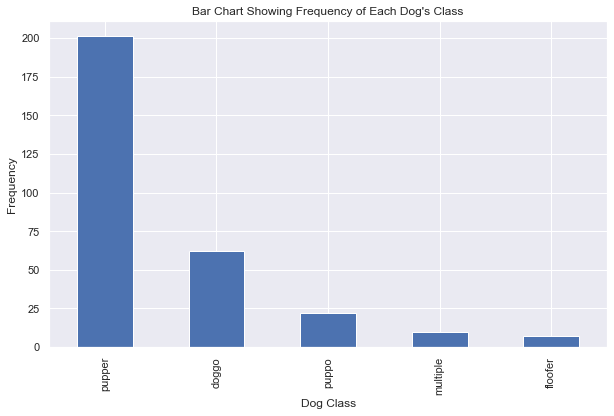

In [78]:
dog_class_count.plot.bar(figsize=(10,6))
plt.title('Bar Chart Showing Frequency of Each Dog\'s Class')
plt.xlabel('Dog Class')
plt.ylabel('Frequency')

##### 2. Most popular dog name 

In [79]:
tweets_only_df.name.nunique()

909

In [80]:
dog_name_count = tweets_only_df.name.value_counts().sort_values(ascending=False).head(10)
dog_name_count

Cooper     10
Oliver     10
Charlie    10
Tucker      9
Penny       9
Lucy        9
Sadie       8
Winston     8
Daisy       7
Toby        7
Name: name, dtype: int64

Text(0, 0.5, 'Frequency')

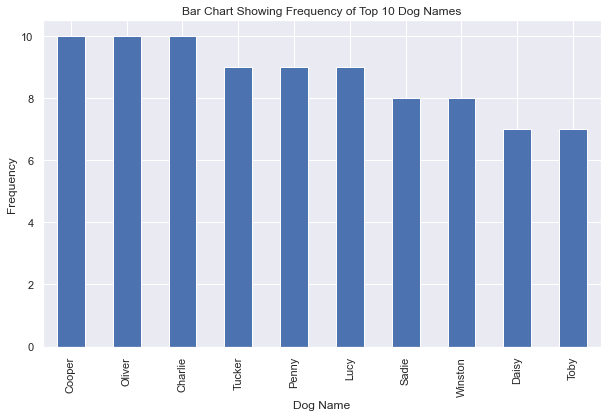

In [81]:
dog_name_count.plot.bar(figsize=(10,6))
plt.title('Bar Chart Showing Frequency of Top 10 Dog Names')
plt.xlabel('Dog Name')
plt.ylabel('Frequency')

#### 3. Average retweet

In [82]:
average_retweet_favorite_count = tweets_only_df.groupby('dog_class')['favorite_count','retweet_count'].mean().sort_values('retweet_count',ascending=False)
average_retweet_favorite_count

/var/folders/67/z7st7hwd1jnbqqwxk1d73wqc0000gn/T/ipykernel_13627/1942013672.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_retweet_favorite_count = tweets_only_df.groupby('dog_class')['favorite_count','retweet_count'].mean().sort_values('retweet_count',ascending=False)


,favorite_count,retweet_count
dog_class,,
doggo,17600.403226,5971.967742
puppo,19574.590909,5325.090909
multiple,15847.600000,4873.300000
floofer,11222.857143,3984.714286
pupper,6250.303483,1924.721393


Text(0, 0.5, 'Average count')

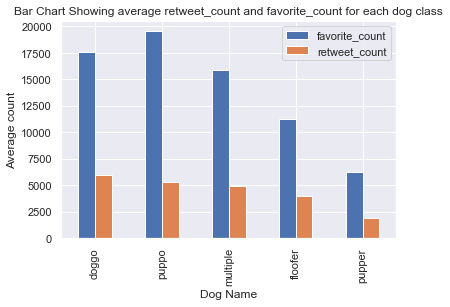

In [83]:
average_retweet_favorite_count.plot.bar()
plt.title('Bar Chart Showing average retweet_count and favorite_count for each dog class')
plt.xlabel('Dog Name')
plt.ylabel('Average count')

##### 4. Distribution of favorite_count

Text(0, 0.5, 'Frequency')

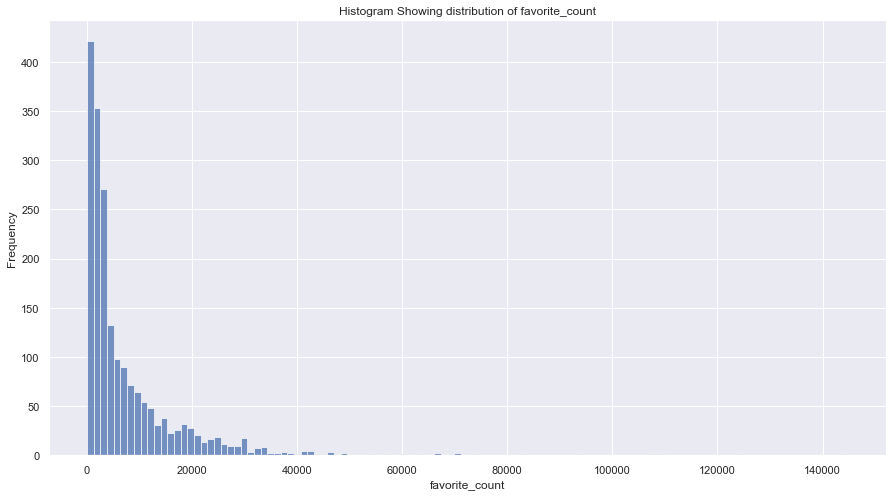

In [84]:
plt.figure(figsize=(15,8))
sns.histplot(data=tweets_only_df, x='favorite_count')
plt.title('Histogram Showing distribution of favorite_count')
plt.xlabel('favorite_count')
plt.ylabel('Frequency')

#### 5. Distribution of retweet_count

Text(0, 0.5, 'Frequency')

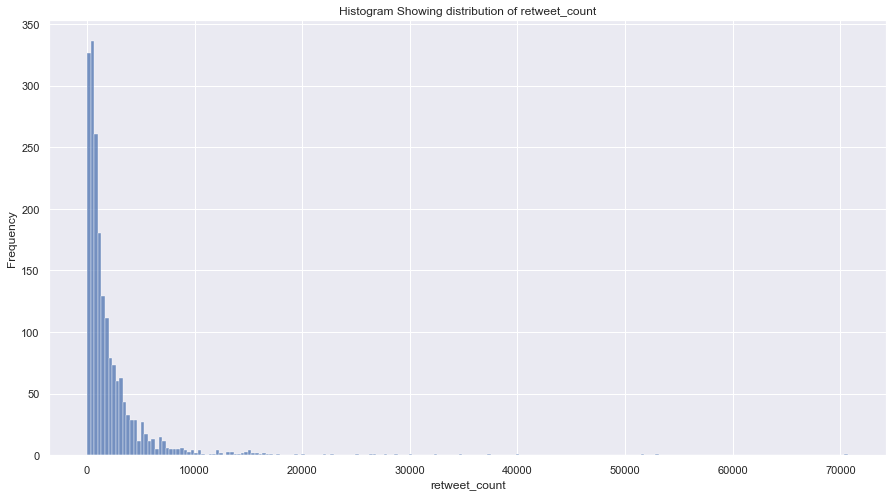

In [85]:
plt.figure(figsize=(15,8))
sns.histplot(data=tweets_only_df, x='retweet_count')
plt.title('Histogram Showing distribution of retweet_count')
plt.xlabel('retweet_count')
plt.ylabel('Frequency')

#### 6. Dogs with the highest retweet and favorite counts

``retweet_count``

In [86]:
outlier_retweet_dogs = tweets_only_df.query('retweet_count >= 10000')

In [87]:
outlier_retweet_dogs_counts = outlier_retweet_dogs.dog_class.value_counts()
outlier_retweet_dogs.dog_class.value_counts()

doggo       7
pupper      5
multiple    2
puppo       2
floofer     1
Name: dog_class, dtype: int64

Text(0, 0.5, 'Frequency')

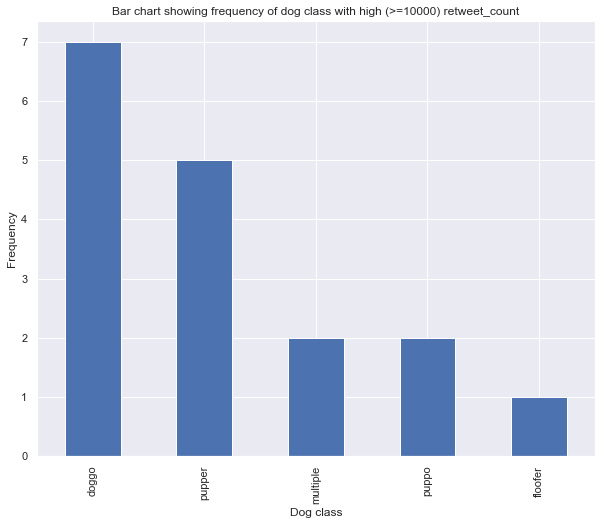

In [88]:
outlier_retweet_dogs_counts.plot.bar(figsize=(10,8))
plt.title('Bar chart showing frequency of dog class with high (>=10000) retweet_count')
plt.xlabel('Dog class')
plt.ylabel('Frequency')

``favorite_count``

In [89]:
outlier_favorite_dogs = tweets_only_df.query('favorite_count >= 20000')

In [90]:
outlier_favorite_dogs_counts = outlier_favorite_dogs.dog_class.value_counts()
outlier_favorite_dogs.dog_class.value_counts()

doggo       12
pupper      12
puppo        5
multiple     2
floofer      1
Name: dog_class, dtype: int64

Text(0, 0.5, 'Frequency')

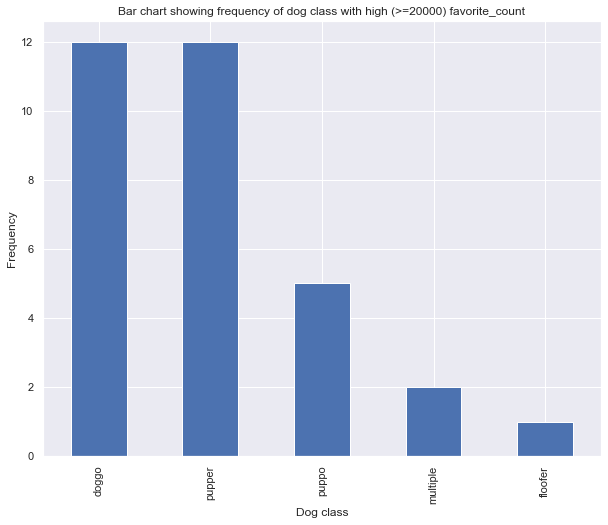

In [91]:
outlier_favorite_dogs_counts.plot.bar(figsize=(10,8))
plt.title('Bar chart showing frequency of dog class with high (>=20000) favorite_count')
plt.xlabel('Dog class')
plt.ylabel('Frequency')

#### Insights gotten

- The Pupper class is the most popular dog class in the dataset.
- Oliver, Cooper, and Charlie are the top three most popular dog names in out dataset
- Doggo dogs seem to be the most loved class of dogs. They rank first in retweet_count and second in the favorite_count.
- The distribution of favorite_count is highly skewed. The chart shows that a few number of dogs had a favorite_count above 20000.
- The distribution of retweet_count is highly skewed. The chart shows that a few number of dogs had a retweet_count above 10000.
- Doggo dogs occupy the largest portion of dogs with retweet_counts greater than 10000.
- Doggo and pupper dogs occupy the largest portion of dogs with favorite_counts greater than 20000.